서론:이번 과제의 목표는 중고차의 가치를 판단할 수 있는 기준을 정해,중고차의 가치를 산정 하고자 하는것이다. 따라서 연식, 주행거리, 엔진 크기, 연비등의 요소를 중심으로 차량 정보를 정리하고,데이터를 깨끗하게 전처리한 뒤, 여러 변수들을 한두 개의 중요한 축으로 줄이기 위해 PCA(주성분 분석) 을 사용, 최종 시각적으로 확인하였다.
즉, 이 분석은 중고차 데이터의 중심 요소를 정리, 중요한 기준만 알 수 있게 축소, 시각화하여 브랜드·모델 간 유의미한 결과를 분석하는데 있다.

In [ ]:
import pandas as pd

# 파일 불러오기
cars_path = '/content/drive/MyDrive/데이터분석/cars.csv'
brand_path = '/content/drive/MyDrive/데이터분석/brand.csv'

data_cars = pd.read_csv(cars_path)
data_brand = pd.read_csv(brand_path)

In [ ]:
display(data_cars.head())

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [ ]:
display(data_brand.head())

,brand,country
0,skoda,czech republic
1,vauxhall,united kingdom
2,hyundai,south korea
3,mini,united kingdom
4,ford,united states


In [ ]:
#1.데이터합치기
#컬럼명 소문자로 통일
data_cars.columns = data_cars.columns.str.lower()
data_brand.columns = data_brand.columns.str.lower()
print(data_cars.head())
print(data_brand.head())

            title  price  mileage(miles)  registration_year  previous owners  \
0     skoda fabia   6900           70189               2016              3.0   
1  vauxhall corsa   1495           88585               2008              4.0   
2     hyundai i30    949          137000               2011              NaN   
3      mini hatch   2395           96731               2010              5.0   
4  vauxhall corsa   1000           85000               2013              NaN   

  fuel type  body type engine gearbox  doors  seats emission class  \
0    Diesel  Hatchback   1.4L  Manual    5.0    5.0         Euro 6   
1    Petrol  Hatchback   1.2L  Manual    3.0    5.0         Euro 4   
2    Petrol  Hatchback   1.4L  Manual    5.0    5.0         Euro 5   
3    Petrol  Hatchback   1.4L  Manual    3.0    4.0         Euro 4   
4    Diesel  Hatchback   1.3L  Manual    5.0    5.0         Euro 5   

  service history     brand  
0             NaN     skoda  
1            Full  vauxhall  
2       

In [ ]:
# 추출한 브랜드명 소문자로 변환
data_cars['brand'] = data_cars['brand'].str.lower()
data_brand['title'] = data_brand['title'].str.lower()


In [ ]:
#병합
merged = pd.merge(data_cars, data_brand, left_on='brand', right_on='title', how='inner')

In [ ]:
# 결과 확인
print("병합된 데이터 크기:", merged.shape)
display(merged.head())

병합된 데이터 크기: (3687, 16)


,title_x,price,mileage(miles),registration_year,previous owners,fuel type,body type,engine,gearbox,doors,seats,emission class,service history,brand,title_y,country
0,skoda fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda,skoda,czech republic
1,vauxhall corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,vauxhall,vauxhall,united kingdom
2,hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,hyundai,hyundai,south korea
3,mini hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,mini,mini,united kingdom
4,vauxhall corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,vauxhall,vauxhall,united kingdom


In [ ]:
merged.drop(columns=['title_y'], inplace=True)
merged.rename(columns={'title_x': 'title'}, inplace=True)

In [ ]:
merged.head()

,title,price,mileage(miles),registration_year,previous owners,fuel type,body type,engine,gearbox,doors,seats,emission class,service history,brand,country
0,skoda fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda,czech republic
1,vauxhall corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,vauxhall,united kingdom
2,hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,hyundai,south korea
3,mini hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,mini,united kingdom
4,vauxhall corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,vauxhall,united kingdom


In [ ]:
#2.카테고리형 변수를 숫자 형태로 변환
merged['engine_num'] = merged['engine'].str.replace('L', '', regex=False).astype(float)
merged['emission_num'] = merged['emission class'].str.extract('(\d+)').astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2007310337.py:3: SyntaxWarning: invalid escape sequence '\d'
  merged['emission_num'] = merged['emission class'].str.extract('(\d+)').astype(float)


In [ ]:
print(merged[['engine', 'engine_num', 'emission class', 'emission_num']].head())

  engine  engine_num emission class  emission_num
0   1.4L         1.4         Euro 6           6.0
1   1.2L         1.2         Euro 4           4.0
2   1.4L         1.4         Euro 5           5.0
3   1.4L         1.4         Euro 4           4.0
4   1.3L         1.3         Euro 5           5.0


In [ ]:
#3.결측치확인
merged[merged['service history'].isna()].head()


,title,price,mileage(miles),registration_year,previous owners,fuel type,body type,engine,gearbox,doors,seats,emission class,service history,brand,country,engine_num,emission_num
0,skoda fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda,czech republic,1.4,6.0
2,hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,hyundai,south korea,1.4,5.0
4,vauxhall corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,vauxhall,united kingdom,1.3,5.0
5,hyundai coupe,800,124196,2007,3.0,Petrol,Coupe,2.0L,Manual,3.0,4.0,Euro 4,NaN,hyundai,south korea,2.0,4.0
6,ford focus,798,140599,2008,NaN,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,ford,united states,1.6,4.0


In [ ]:
#결측치를 'Unknown'으로 채우기
merged['service history'].fillna('Unknown', inplace=True)

/tmp/ipython-input-1845521917.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged['service history'].fillna('Unknown', inplace=True)


In [ ]:
print(merged['service history'].isna().sum())  # 0이면 성공

0


In [ ]:
#전체 컬럼 수의 절반 이상이 결측치인 행은 제거
threshold = len(merged.columns) / 2
merged = merged.dropna(thresh=threshold)

In [ ]:
#결과 확인
print("결측치 제거 후 데이터 크기:", merged.shape)

결측치 제거 후 데이터 크기: (3687, 17)


In [ ]:
merged

,title,price,mileage(miles),registration_year,previous owners,fuel type,body type,engine,gearbox,doors,seats,emission class,service history,brand,country,engine_num,emission_num
0,skoda fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,skoda,czech republic,1.4,6.0
1,vauxhall corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,vauxhall,united kingdom,1.2,4.0
2,hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,Unknown,hyundai,south korea,1.4,5.0
3,mini hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,mini,united kingdom,1.4,4.0
4,vauxhall corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,Unknown,vauxhall,united kingdom,1.3,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,renault megane,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,Unknown,renault,france,1.6,4.0
3683,audi a4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,Unknown,audi,germany,2.0,5.0
3684,bmw 3 series,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,Unknown,bmw,germany,2.0,5.0
3685,honda accord,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,honda,japan,2.2,4.0


In [ ]:
#4.스케일러 확인
#연식과 주행거리 기준으로 가성비 중고차 분석(연식_최근일수록 높고, 주행거리_적게 달릴수록 높다)
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 사용할 컬럼 선택
cols = ['mileage(miles)', 'registration_year']

# 결측치 제거 (필수)
df = merged.dropna(subset=cols).copy()


In [ ]:
scaler = StandardScaler()
Z = scaler.fit_transform(df[cols])

# 표준화된 값 데이터프레임으로 추가
Zdf = pd.DataFrame(Z, columns=[f'z_{c}' for c in cols], index=df.index)
df = pd.concat([df, Zdf], axis=1)


In [ ]:
# 가성비 점수 계산 (높을수록 좋음)
df['value_score_raw'] = (
    -df['z_mileage(miles)'] +  # 주행거리 낮을수록 +
    df['z_registration_year']  # 연식 높을수록 +
)

In [ ]:
#점수를 0-100으로 환산
def to_0_100(s):
    return 100 * (s - s.min()) / (s.max() - s.min())

df['value_score'] = to_0_100(df['value_score_raw'])
df['value_score'].describe()


,value_score
count,3687.000000
mean,86.734846
std,5.233198
min,0.000000
25%,83.417580
50%,86.421263
75%,90.185232
max,100.000000


In [ ]:
#점수높은 상위 20개 차량
cols_show = ['title', 'brand', 'mileage(miles)', 'registration_year', 'price', 'value_score']
top_cars = df.sort_values('value_score', ascending=False)[cols_show].head(20)
print(top_cars)


                    title       brand  mileage(miles)  registration_year  \
3219             mg mg zs          mg               1               2023   
3100             mg mg zs          mg               1               2023   
3102           seat ateca        seat             222               2023   
2760             mg mg hs          mg            1048               2023   
2967       renault arkana     renault           16228               2023   
3151  dacia duster estate       dacia           10424               2022   
3235  kia xceed hatchback         kia            4000               2021   
3047         renault clio     renault           12294               2022   
2080           kia stonic         kia           12875               2022   
2949          ford fiesta        ford            6561               2021   
2897        dacia sandero       dacia            7083               2021   
3190       vauxhall corsa    vauxhall            8720               2021   
2885        

In [ ]:
#5.기존 데이터의 정보 70% 이상을 가지는 수준에서 최소한의 주성분 추출 (PCA)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# 컬럼 선택
cols = ['price', 'mileage(miles)', 'engine_num', 'registration_year']

# 결측치 제거
df_pca = merged.dropna(subset=cols).copy()

# 표준화 (PCA 전 필수 단계)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca[cols])

# PCA 수행
pca = PCA().fit(scaled_data)

# 누적 분산 비율 계산
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# 70% 이상 설명하는 최소 주성분 개수 찾기
n_components_70 = np.argmax(cumulative_variance >= 0.7) + 1

print(f"70% 이상의 정보를 유지하려면 최소 {n_components_70}개의 주성분이 필요합니다.")
print("각 주성분별 설명 비율:", pca.explained_variance_ratio_)
print("누적 설명 비율:", cumulative_variance)


70% 이상의 정보를 유지하려면 최소 2개의 주성분이 필요합니다.
각 주성분별 설명 비율: [0.55220933 0.25119596 0.14744188 0.04915283]
누적 설명 비율: [0.55220933 0.80340529 0.95084717 1.        ]


In [ ]:
# 최소 주성분 개수만큼 다시 변환
pca = PCA(n_components=n_components_70)
pca_data = pca.fit_transform(scaled_data)

# 변환된 데이터프레임 생성
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(n_components_70)])
display(pca_df.head())


,PC1,PC2
0,0.883922,-0.182137
1,-0.823445,-1.230067
2,-1.294179,-0.624852
3,-0.707099,-0.689894
4,-0.329277,-0.969005


In [ ]:
#pc1이 어떤 축인지 변수 기여도 확인
loadings = pd.DataFrame(pca.components_.T,
                        index=['price', 'mileage', 'engine_num', 'registration_year'],
                        columns=['PC1', 'PC2'])
print(loadings)


                        PC1       PC2
price              0.564410  0.446963
mileage           -0.510072  0.175637
engine_num        -0.290075  0.863968
registration_year  0.580624  0.151444


In [ ]:
#시각표현
import matplotlib.pyplot as plt



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/

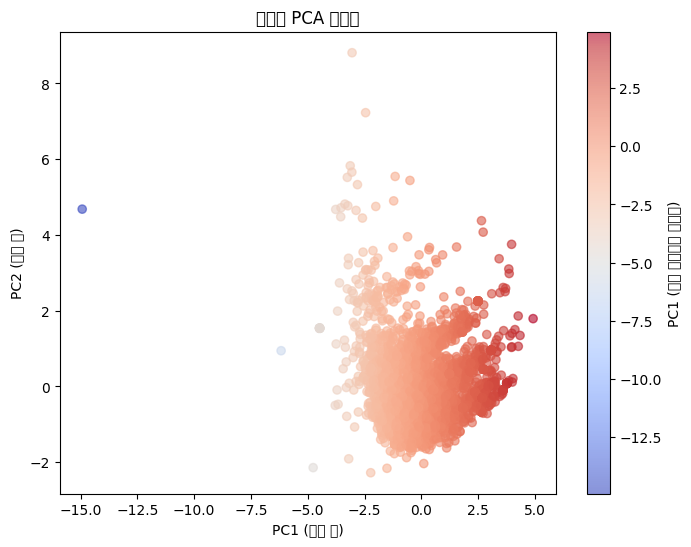

In [ ]:
# 시각화로 이상치 확인
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6, c=pca_df['PC1'], cmap='coolwarm')
plt.xlabel('PC1 (가치 축)')
plt.ylabel('PC2 (성능 축)')
plt.title('중고차 PCA 시각화')
plt.colorbar(label='PC1 (가치 높을수록 붉은색)')
plt.show()


In [ ]:
#브랜드별 평균 가치(PC1 기준) 순위를 시각화
#1.브랜드별 평균 PC1 계산
pca_df['brand'] = merged['brand']  # merged 데이터에서 브랜드 가져오기


In [ ]:
brand_mean = pca_df.groupby('brand')['PC1'].mean().sort_values(ascending=False)
print(brand_mean.head(10))

brand
lagonda          2.923628
smart            0.791269
ds               0.653315
marcos           0.588517
infiniti         0.579338
jaguar           0.530865
maserati         0.527482
dodge            0.522903
mercedes-benz    0.481571
ssangyong        0.399839
Name: PC1, dtype: float64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

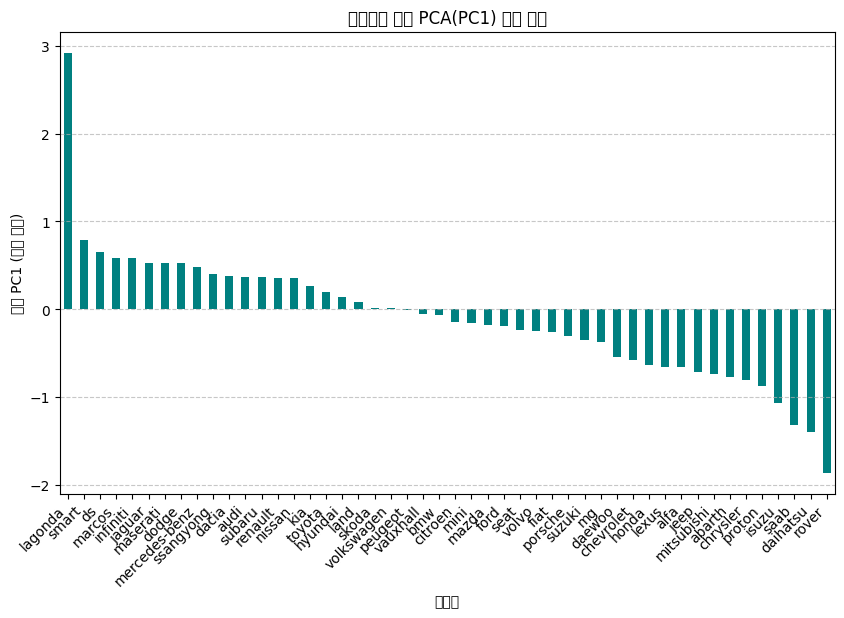

In [ ]:
#막대그래프 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
brand_mean.plot(kind='bar', color='teal')
plt.title('브랜드별 평균 PCA(PC1) 가치 점수')
plt.ylabel('평균 PC1 (가치 점수)')
plt.xlabel('브랜드')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

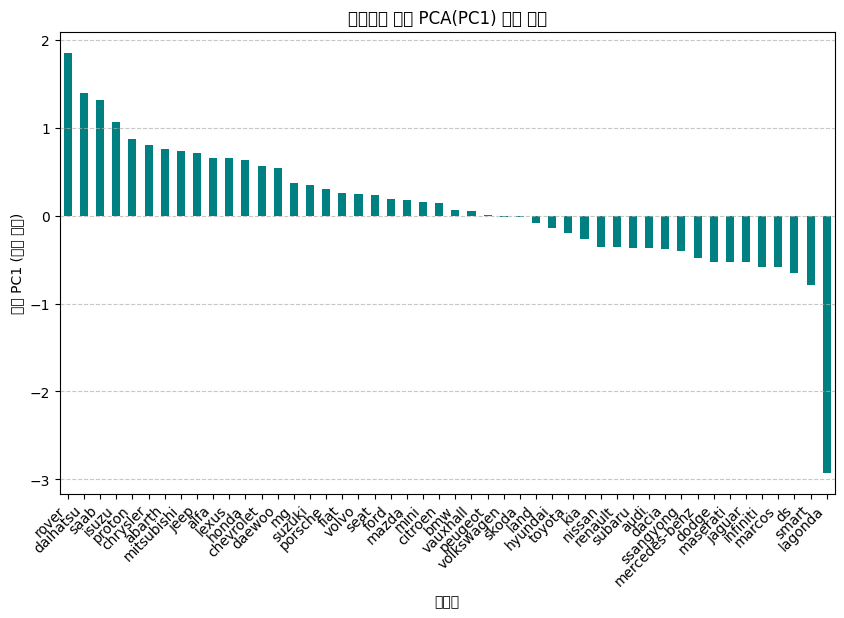

In [ ]:
# PC1 방향 반전 (가치 높은 브랜드가 오른쪽으로 오게)
pca_df['PC1'] = pca_df['PC1'] * -1

# 다시 브랜드별 평균 시각화로 분포 확인
brand_mean = pca_df.groupby('brand')['PC1'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
brand_mean.plot(kind='bar', color='teal')
plt.title('브랜드별 평균 PCA(PC1) 가치 점수')
plt.ylabel('평균 PC1 (가치 점수)')
plt.xlabel('브랜드')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


브랜드별 평균 PC1 값을 계산한 것은 PCA에서 얻은 가치·가성비 축(PC1) 을 기준으로 각 브랜드의 중고차 가치 수준을 비교하기 위한 것이다. PC1이 높을수록 가격 대비 조건이 좋고 가치가 잘 유지되는 브랜드라는 의미다. 평균 PC1 상위 20% 브랜드는 중고차로서 가장 효율적이고 가치가 높은 브랜드 그룹으로 볼 수 있다.

이번 분석을 통해 여러 조건을 하나의 지표로 통합해 브랜드별 중고차 가치를 정량적으로 비교할 수 있다는 점이 유용하다고 느꼈다. 다만 실제 중고차 가치는 연비·주행거리뿐 아니라 디자인 선호도, 브랜드 이미지, 유지비 등 소비자가 중요하게 생각하는 다양한 요소도 영향을 줄 수 있으므로, 이러한 요인을 추가해 더 폭넓게 분석해보면 의미 있는 결과를 얻을 수 있을 것 같다는 생각을 했다.